# Ad-Hoc Code for Ablation Study Plots

In [144]:
import pickle
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats, norm

from utils import DotDict

In [2]:
with open('out/cp_ablation/CP_ablation.out', 'rb') as f:
    results = pickle.load(f)
    
config = DotDict.from_json('out/cp_ablation/ablation_schedule_20201203-111902.json')

In [238]:
def eCDFs(data: list, bins = 20, label: list = None):  # Not actual eCDF
    
    probs = list()
    success_ratio = list()
    plot_data = list()
    for v in data:
        y, x, _ = plt.hist(v.T, cumulative=True, bins=bins)
        plt.close()
    
        x = np.linspace(np.min(y), np.max(y), v.shape[-1])
        
        # Checks whether ERT is infinite at x0.
        fail_mask = v.max(axis=1) != v.max()
        success_ratio.append(1 - fail_mask.astype(int).sum() / len(v))
        probs.append(1-fail_mask.astype(int))
        
        aggr = np.median(v, axis=0)
        
        plot_data.append((x, aggr))
    
    plt.figure(figsize=(8,7))
    plt.grid(linestyle='--', linewidth=1)
    
    for i, (x, y) in enumerate(plot_data):            
        if label is not None:
            plt.plot(x, y, label=label[i])
        else:
            plt.plot(x, y)
    
    if label is not None:
        plt.legend()
        
    plt.title("Median Cumulative Reward over Trials", fontsize=15)

    plt.xlabel("Trials (Number of selfplay iterations)", fontsize=13)
    plt.ylabel("Cumulative Reward", fontsize=13)
    
    return plot_data, success_ratio, probs


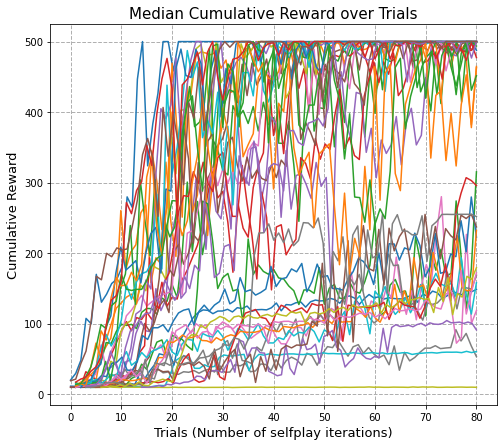

In [239]:
# Example
plot_data, success, ps = eCDFs(list(results.values()))

In [99]:
K = list()
L = list()
dec = list()
penalty = list()

for k, v in config.items():
    K.append(v.args.K)
    L.append(v.args.latent_depth)
    dec.append(v.args.latent_decoder)
    penalty.append(v.args.dynamics_penalty)
    

In [11]:
k1 = list()
k5 = list()
k10 = list()

for k, v in config.items():
    v.args.recursive_update(v.net_args)
  
    if v.args.K == 1:
        k1.append(v.args)
    elif v.args.K == 5:
        k5.append(v.args)
    elif v.args.K == 10:
        k10.append(v.args)

[0.875, 0.875, 0.75, 0.75, 0.75, 0.75, 0.75, 0.25, 1.0, 0.375, 0.375, 1.0, 0.375, 0.625, 1.0, 0.75, 0.5, 0.375, 0.125, 0.25, 0.25, 0.375, 0.625, 0.5, 0.375, 0.5, 0.25, 0.5, 0.375, 0.875, 1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


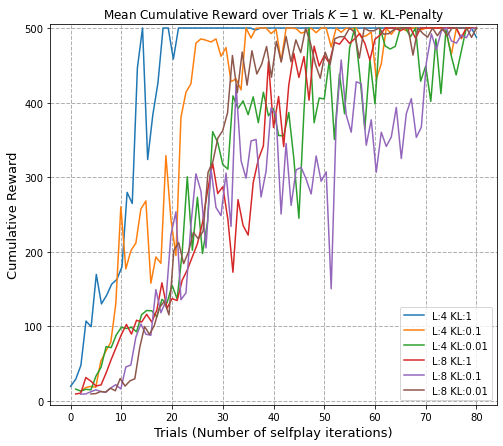

[0.875, 0.875, 0.75, 0.75, 0.75, 0.75, 0.75, 0.25, 1.0, 0.375, 0.375, 1.0, 0.375, 0.625, 1.0, 0.75, 0.5, 0.375, 0.125, 0.25, 0.25, 0.375, 0.625, 0.5, 0.375, 0.5, 0.25, 0.5, 0.375, 0.875, 1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


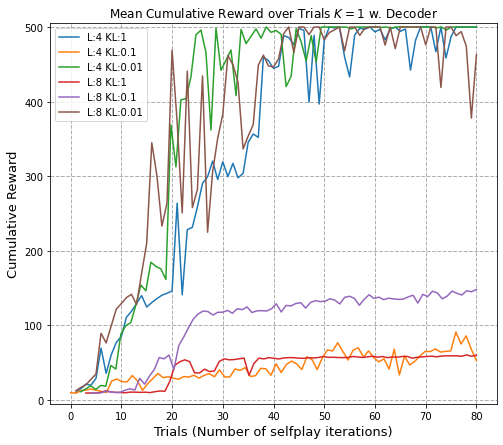

In [241]:
plot_data, k1_kl, k1_kl_p = eCDFs(list(results.values())[0:6], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[:6]])
plt.title(r"Mean Cumulative Reward over Trials $K=1$ w. KL-Penalty")
print(success)
plt.ylim([-5, 505])
plt.show()

plot_data, k1_d, k1_d_p = eCDFs(list(results.values())[6:12], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[6:]])
plt.title(r"Mean Cumulative Reward over Trials $K=1$ w. Decoder")
print(success)
plt.ylim([-5, 505])
plt.show()

[0.875, 0.875, 0.75, 0.75, 0.75, 0.75, 0.75, 0.25, 1.0, 0.375, 0.375, 1.0, 0.375, 0.625, 1.0, 0.75, 0.5, 0.375, 0.125, 0.25, 0.25, 0.375, 0.625, 0.5, 0.375, 0.5, 0.25, 0.5, 0.375, 0.875, 1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


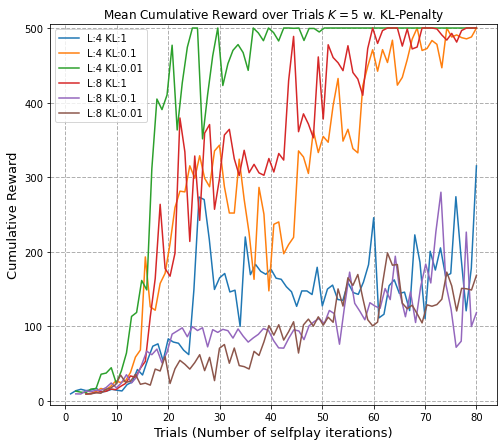

[0.875, 0.875, 0.75, 0.75, 0.75, 0.75, 0.75, 0.25, 1.0, 0.375, 0.375, 1.0, 0.375, 0.625, 1.0, 0.75, 0.5, 0.375, 0.125, 0.25, 0.25, 0.375, 0.625, 0.5, 0.375, 0.5, 0.25, 0.5, 0.375, 0.875, 1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


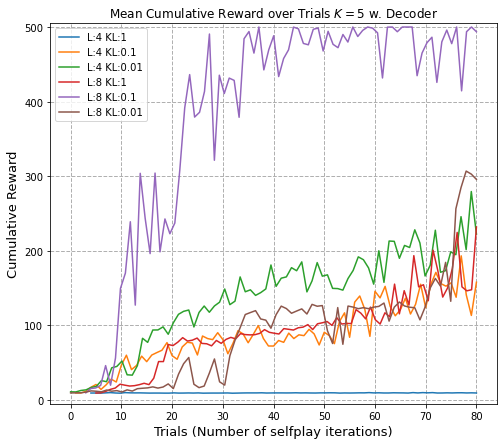

In [242]:
plot_data, k5_kl, k5_kl_p = eCDFs(list(results.values())[12:18], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[:6]])
plt.title(r"Mean Cumulative Reward over Trials $K=5$ w. KL-Penalty")
print(success)
plt.ylim([-5, 505])
plt.show()

plot_data, k5_d, k5_d_p = eCDFs(list(results.values())[18:24], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[6:]])
plt.title(r"Mean Cumulative Reward over Trials $K=5$ w. Decoder")
print(success)
plt.ylim([-5, 505])
plt.show()

[0.875, 0.875, 0.75, 0.75, 0.75, 0.75, 0.75, 0.25, 1.0, 0.375, 0.375, 1.0, 0.375, 0.625, 1.0, 0.75, 0.5, 0.375, 0.125, 0.25, 0.25, 0.375, 0.625, 0.5, 0.375, 0.5, 0.25, 0.5, 0.375, 0.875, 1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


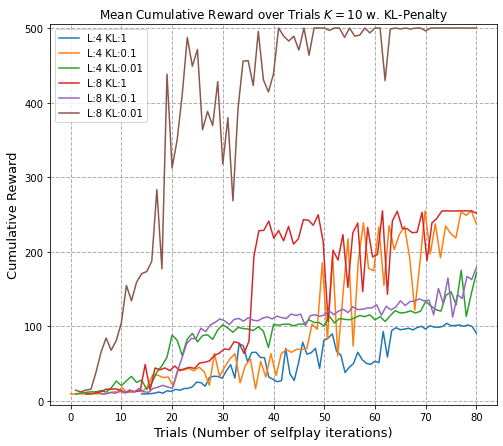

[0.875, 0.875, 0.75, 0.75, 0.75, 0.75, 0.75, 0.25, 1.0, 0.375, 0.375, 1.0, 0.375, 0.625, 1.0, 0.75, 0.5, 0.375, 0.125, 0.25, 0.25, 0.375, 0.625, 0.5, 0.375, 0.5, 0.25, 0.5, 0.375, 0.875, 1.0, 0.75, 0.875, 0.875, 0.875, 0.875]


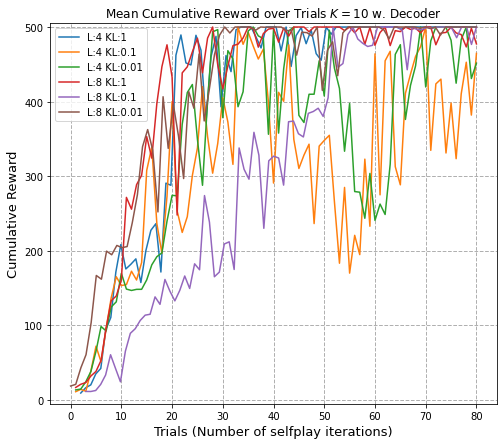

In [244]:
plot_data, k10_kl, k10_kl_p = eCDFs(list(results.values())[24:30], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[:6]])
plt.title(r"Mean Cumulative Reward over Trials $K=10$ w. KL-Penalty")
print(success)
plt.ylim([-5, 505])
plt.show()

plot_data, k10_d, k10_d_p = eCDFs(list(results.values())[30:36], bins=20, label=[f'L:{x.latent_depth} KL:{x.dynamics_penalty}' for x in k5[6:]])
plt.title(r"Mean Cumulative Reward over Trials $K=10$ w. Decoder")
print(success)
plt.ylim([-5, 505])
plt.show()

In [111]:
df = pd.DataFrame(np.array([k1_kl, k5_kl, k10_kl, k1_d, k5_d, k10_d]).ravel('F'), columns=['success'])

df['K'] = K
df['Regularization'] = ['dec' if b else 'kl' for b in dec]
df['L'] = L
df['Penalty'] = penalty

df

,success,K,Regularization,L,Penalty
0,0.875,1,dec,4,1.00
1,0.375,1,dec,4,0.10
2,0.375,1,dec,4,0.01
3,0.750,1,dec,8,1.00
4,0.125,1,dec,8,0.10
5,1.000,1,dec,8,0.01
6,0.875,1,kl,4,1.00
7,0.625,1,kl,4,0.10
8,0.500,1,kl,4,0.01
9,0.250,1,kl,8,1.00


In [479]:
grouped = df.groupby(['Regularization', 'Penalty'])
logodds = lambda x: np.log(x / (1 - x + 0.01))
sigmoid = lambda x: 1 / (1+np.exp(-x)) - 0.01


vals = list()
for k, g in grouped:
    print(len(g))
    lo = logodds(g.success)
    
    # 60% CIs
    CI = np.asarray([sigmoid(lo.mean() - norm.ppf(0.8) * lo.std()), sigmoid(lo.mean() + norm.ppf(0.8) * lo.std())])
    
    print(g.Regularization.unique(), g.Penalty.unique(), g.L.unique(), g.K.unique())
    print(g.success.mean(), sigmoid(lo.mean()), CI)
    vals.append((sigmoid(lo.mean()), CI))

    
means, CIs = list(zip(*vals))
print(means)

6
['dec'] [0.01] [4 8] [ 1  5 10]
0.625 0.7268452218825852 [0.30007872 0.93578319]
6
['dec'] [0.1] [4 8] [ 1  5 10]
0.4791666666666667 0.5511115006967919 [0.14588827 0.88848412]
6
['dec'] [1.] [4 8] [ 1  5 10]
0.75 0.810675756081327 [0.51233753 0.94037941]
6
['kl'] [0.01] [4 8] [ 1  5 10]
0.7291666666666666 0.7410909051035096 [0.57065652 0.85800218]
6
['kl'] [0.1] [4 8] [ 1  5 10]
0.4791666666666667 0.4633104675719746 [0.30703955 0.62499151]
6
['kl'] [1.] [4 8] [ 1  5 10]
0.6666666666666666 0.7511614444850976 [0.35798649 0.93578101]
(0.7268452218825852, 0.5511115006967919, 0.810675756081327, 0.7410909051035096, 0.4633104675719746, 0.7511614444850976)


In [300]:
# Add non-ablation study data (normal MuZero)
with open('out/cp_ablation/CP_normal.out', 'rb') as f:
    normal = pickle.load(f)

In [310]:
normal['names']
aggr = normal['data'][[3, 4, 5, 11, 12]]
aggr.shape

(5, 8, 100)

In [560]:
data = np.any(aggr == 500, axis=-1).mean(axis=1)
lo = logodds(data)

m = sigmoid(lo.mean())
CI = [sigmoid(lo.mean() - norm.ppf(0.8) * lo.std()), sigmoid(lo.mean() + norm.ppf(0.8) * lo.std())]
CI

[0.4334452079012394, 0.6901858347159704]

In [329]:
CI

[0.4434452079012394, 0.7001858347159704]

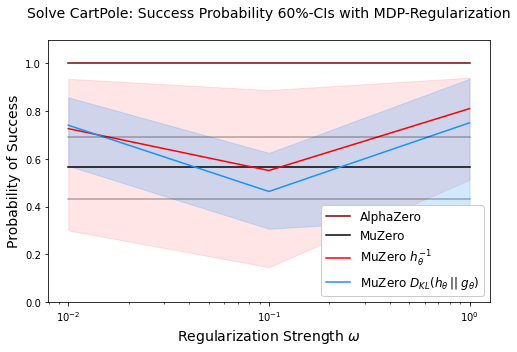

In [565]:
plt.figure(figsize=(7, 5))

plt.plot([0.01, 1], [1, 1], c='maroon', label="AlphaZero")
plt.plot([], [], label='MuZero', c='black')
plt.plot([0.01, 1.], [m, m], linestyle='-', c='black')
plt.plot([0.01, 0.1, 1.], means[:3], c='red', label=r'MuZero $h_{\theta}^{-1}$')
plt.plot([0.01, 0.1, 1.], means[3:], c=u'#1593FF', label=r'MuZero $D_{KL}(h_{\theta} \: \vert \vert \: g_{\theta})$')

plt.plot([0.01, 1.], [CI[0]] * 2, alpha=0.3, zorder=3, color='black')
plt.plot([0.01, 1.], [CI[1]] * 2, alpha=0.3, zorder=3, color='black')
plt.fill_between([0.01, 0.1, 1.], *list(zip(*CIs[:3])), color='red', alpha=0.1)
plt.fill_between([0.01, 0.1, 1.], *list(zip(*CIs[3:])), color=u'#1593FF', alpha=0.2)

plt.xlabel("Regularization Strength $\omega$", fontsize=14)
plt.ylabel("Probability of Success", fontsize=14)
plt.title("Solve CartPole: Success Probability 60%-CIs with MDP-Regularization\n", fontsize=14)

plt.ylim([0, 1.1])
plt.xscale('log')
plt.legend(fontsize=12, loc='lower right', framealpha=1)

plt.tight_layout()

plt.savefig("out/figures/CPRegularization_MarginalSuccess.svg", format='svg')
plt.show()

In [357]:
# Add non-ablation study data (normal MuZero)
with open('out/cp_ablation/A0CP_ablation.out', 'rb') as f:
    A0 = pickle.load(f)

In [388]:
kl = list(results.values())[0:6] + list(results.values())[12:18] + list(results.values())[24:30]
dec = list(results.values())[6:12] + list(results.values())[18:24] + list(results.values())[30:]

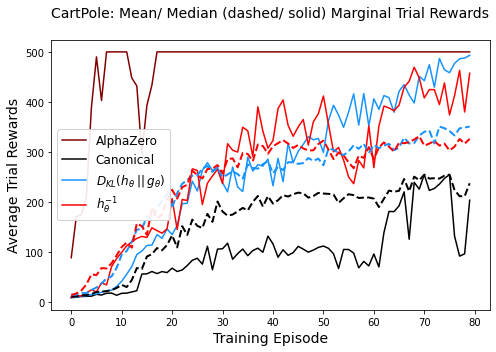

In [555]:
plt.figure(figsize=(7, 5))

plt.plot(np.median(A0, axis=0)[:80], c='maroon', label='AlphaZero')
plt.plot(np.median(np.median(aggr, axis=1),axis=0)[:80], c='black', label='Canonical')
plt.plot(np.median(np.median(kl, axis=1),axis=0), c=u'#1593FF', label=r'$D_{KL}(h_{\theta} \: \vert \vert \: g_{\theta})$')
plt.plot(np.median(np.median(dec, axis=1),axis=0), c='red', label=r'$h_{\theta}^{-1}$')

plt.plot(np.median(np.mean(aggr, axis=1),axis=0)[:80], c='black', linestyle='--', linewidth=2)
plt.plot(np.median(np.mean(kl, axis=1),axis=0), c=u'#1593FF', linestyle='--', linewidth=2)
plt.plot(np.median(np.mean(dec, axis=1),axis=0), c='red', linestyle='--', linewidth=2)

plt.title("CartPole: Mean/ Median (dashed/ solid) Marginal Trial Rewards\n", fontsize=14)
plt.ylabel(r"Average Trial Rewards", fontsize=14)
plt.xlabel("Training Episode", fontsize=14)

plt.legend(fontsize=12, framealpha=.9, loc='center left')

plt.tight_layout()
plt.savefig('out/figures/CPRegularization_CPProgress.svg', format='svg')
plt.show()

In [488]:
with open('out/mc_out/MC_results.out', 'rb') as f:
    mc = pickle.load(f)

In [489]:
for k in mc.keys():
    print(k)

mc_out/logs/AlphaZero/Gym/MC_Base_Gym_gym_MountainCar-v0_20201217-115307/metrics/events.out.tfevents.1608202387.DESKTOP-CHAOUF1.31868.534.v2
mc_out/logs/MuZero/Gym/MC_Base_d_Gym_gym_MountainCar-v0_20201210-095502/metrics/events.out.tfevents.1607590502.DESKTOP-CHAOUF1.32276.962.v2
mc_out/logs/MuZero/Gym/MC_Base_d_Gym_gym_MountainCar-v0_20201211-155156/metrics/events.out.tfevents.1607698317.DESKTOP-CHAOUF1.22512.962.v2
mc_out/logs/MuZero/Gym/MC_Base_Gym_gym_MountainCar-v0_20201130-111621/metrics/events.out.tfevents.1606731382.DESKTOP-CHAOUF1.20564.962.v2
mc_out/logs/MuZero/Gym/MC_Base_Gym_gym_MountainCar-v0_20201203-204117/metrics/events.out.tfevents.1607024477.DESKTOP-CHAOUF1.1104.962.v2
mc_out/logs/MuZero/Gym/MC_Base_kl_Gym_gym_MountainCar-v0_20201130-111910/metrics/events.out.tfevents.1606731551.DESKTOP-CHAOUF1.1796.962.v2
mc_out/logs/MuZero/Gym/MC_Base_kl_Gym_gym_MountainCar-v0_20201204-070332/metrics/events.out.tfevents.1607061813.DESKTOP-CHAOUF1.23420.962.v2


In [601]:
values = np.array(list(mc.values()))
labels = ['AlphaZero', r'MuZero $h^{-1}_\theta$', r'MuZero', r'MuZero $D_{KL}(h_{\theta} \: \vert \vert \: g_{\theta})$']
colors = ['maroon', 'red', 'red', 'black', 'black', u'#1593FF', u'#1593FF']
style = ['-', '--', '-', '-', '--', '-', '--', '-']

C:\Users\joery\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


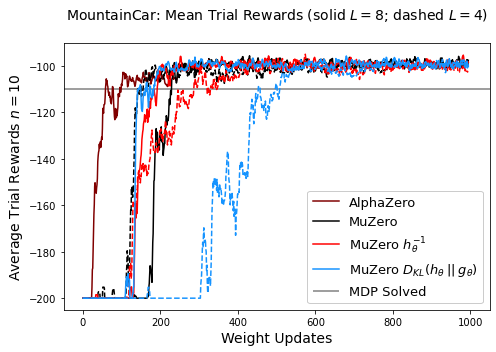

In [612]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.figure(figsize=(7, 5))

for i in [0, 2, 1, 3]:
    plt.plot([], [], c=colors[i*2], label=labels[i])

for i in [0, 4, 3, 1, 2, 6, 5]:
    plt.plot(moving_average(values[i], 5), c=colors[i], linestyle=style[i])

plt.hlines(-110, -100, 1100, color='grey', label='MDP Solved')
    
plt.legend(fontsize=13, framealpha=1)

plt.title("MountainCar: Mean Trial Rewards (solid $L=8$; dashed $L=4$)\n", fontsize=14)
plt.ylabel('Average Trial Rewards $n=10$', fontsize=14)
plt.xlabel("Training Steps", fontsize=14)

plt.xlim([-50, 1050])
plt.ylim([-205, -90])
plt.tight_layout()

plt.savefig('out/figures/MC_Progress.svg', format='svg')
plt.show()